In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

df_xgb = pd.read_csv('data/raw/BIT_AI_assignment_data.csv')
y = df_xgb['Sales Price']
X = df_xgb.drop(columns=['Sales Price'])

for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

/var/folders/pj/kpd4vj4j6_b_l77b3ry75hp40000gn/T/ipykernel_58402/2241791030.py:8: DtypeWarning: Columns (14,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_xgb = pd.read_csv('data/raw/BIT_AI_assignment_data.csv')


Fitting XGBRegressor...
Fit complete.
Feature importance plot saved as 'xgb_raw_feature_importance.png'
Top 10 Features:
                      Feature  Importance
19  Product Group Description    0.295833
15               Machine Size    0.177060
16  Product Class Description    0.068587
21                  Enclosure    0.064899
41            Hydraulics Flow    0.044367
6                   Year Made    0.044062
12      Secondary Description    0.033606
42                Tupper Type    0.033285
18              Product Group    0.025013
34                     Ripper    0.022505


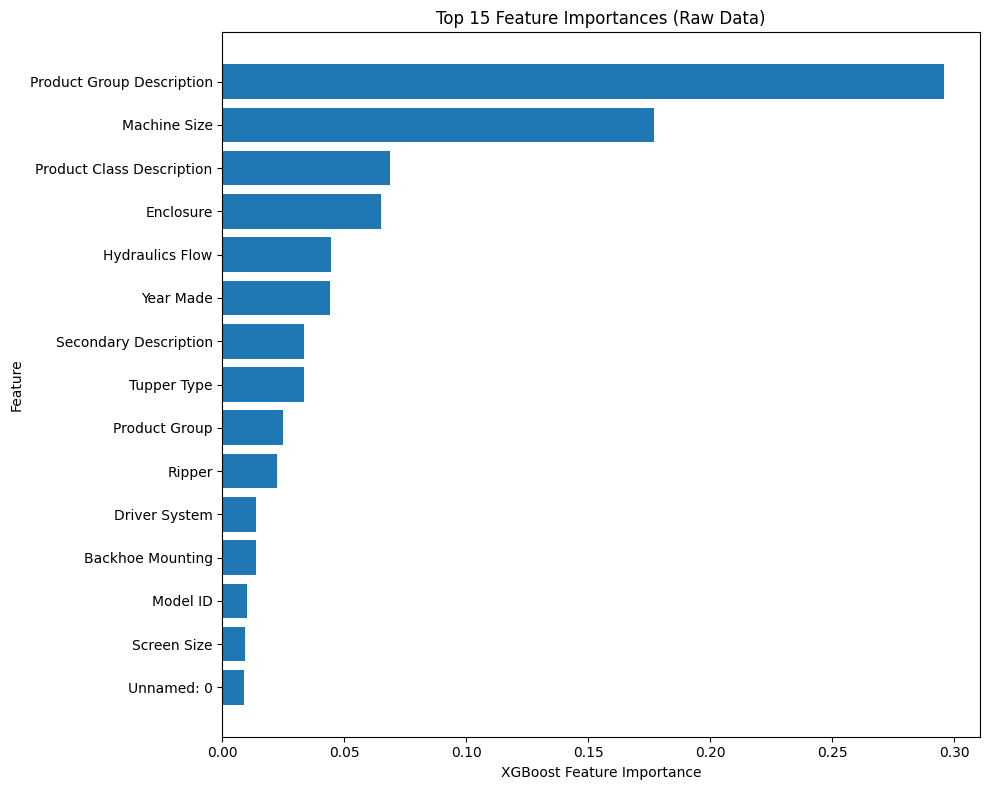

In [10]:
print("Fitting XGBRegressor...")
xgb_reg = xgb.XGBRegressor(n_estimators=1000, random_state=42, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
print("Fit complete.")

# --- Get Feature Importances ---
importances = xgb_reg.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 15 features
plt.figure(figsize=(10, 8))
plt.barh(
    importance_df['Feature'].head(15),
    importance_df['Importance'].head(15)
)
plt.xlabel("XGBoost Feature Importance")
plt.ylabel("Feature")
plt.title("Top 15 Feature Importances (Raw Data)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('xgb_raw_feature_importance.png')

print("Feature importance plot saved as 'xgb_raw_feature_importance.png'")
print("Top 10 Features:")
print(importance_df.head(10))

In [11]:
from sklearn.metrics import r2_score

y_pred = xgb_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Test set MAE: {mae:.2f}")
score_pass_1 = r2_score(y_test, y_pred)
print(score_pass_1)

Test set MAE: 5657.28
0.8606424718753714
